In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline


In [2]:
x,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
x

array([[-0.99142201, -5.86203225],
       [ 2.89359942, -5.91304412],
       [-1.54097809, -3.83785011],
       ...,
       [-9.19736394, -4.97419881],
       [-9.99448556, -7.90780728],
       [-0.15951495, -4.86288539]])

In [4]:
y

array([1, 0, 1, 2, 0, 0, 1, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 2, 1, 1, 0, 2, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 1, 1, 0,
       0, 1, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2,
       0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 2, 0, 1, 1, 1, 2, 0, 1, 1, 0, 0,
       0, 2, 1, 0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 1,
       0, 2, 0, 0, 0, 1, 0, 2, 2, 0, 0, 2, 2, 1, 2, 0, 2, 0, 0, 0, 1, 2,
       2, 2, 1, 2, 0, 2, 2, 0, 0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 2, 1, 2,
       2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 1, 2, 0,
       2, 2, 1, 0, 0, 1, 2, 2, 2, 1, 1, 2, 0, 0, 1, 1, 2, 1, 1, 2, 2, 2,
       2, 2, 0, 1, 0, 2, 1, 1, 2, 1, 2, 0, 1, 2, 1, 2, 0, 0, 2, 1, 0, 0,
       1, 1, 0, 0, 2, 1, 2, 1, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 2, 2,
       1, 0, 0, 0, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0,

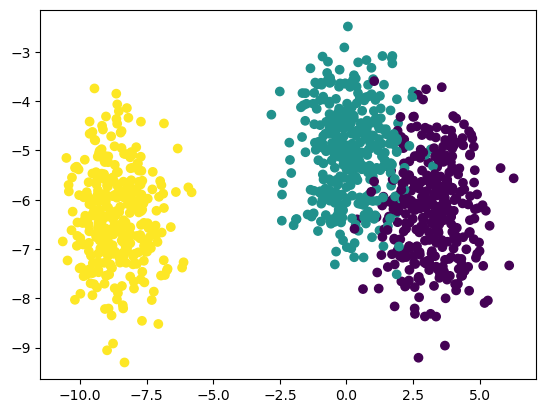

In [5]:
plt.scatter(x[:,0],x[:,1],c=y)

In [6]:
## standardization - feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test =train_test_split(x,y,test_size=0.33,random_state=42)

In [8]:
x_train

array([[ 0.21053676, -6.37775263],
       [ 2.36140992, -5.22151577],
       [-0.0436207 , -3.63790784],
       ...,
       [ 0.96096526, -6.760663  ],
       [-0.12643496, -6.82470508],
       [-8.28113911, -7.27946179]])

In [9]:
x_train_scaled = scaler.fit_transform(x_train)

In [10]:
x_test_scaled = scaler.transform(x_test)

In [11]:
from sklearn.cluster import KMeans

In [12]:
# elbow method to select k value
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++') # init means initialzation, we are initialzing with kmeans++ technique as studied in theory
    kmeans.fit(x_train_scaled)
    wcss.append(kmeans.inertia_) # stores within cluster sum of squares
     

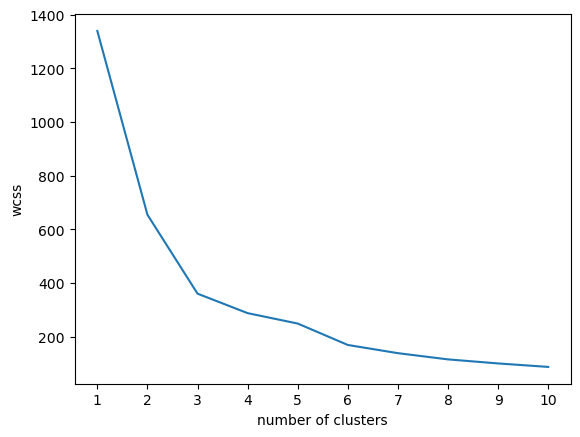

In [18]:
# plot elbow curve to choose k value
plt.plot(range(1,11),wcss) # xaxis is given as range 0-11,and y axis is the corresponding wcss value for that x value, this will make a line plot between these values
plt.xticks(range(1,11)) # this is just labelling every x axis point on xaxis for user understanding , iske bgher bh plot bn skta
plt.xlabel("number of clusters")
plt.ylabel("wcss")
plt.show()


In [19]:
# we choose k=3 because after 3 it is not falling further and becoming stable
kmeans = KMeans(n_clusters=3,init='k-means++') # ceates 3 cenroids


In [20]:
kmeans.fit_predict(x_train_scaled)

array([1, 2, 2, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 0,
       2, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1,
       2, 0, 0, 0, 2, 2, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0,
       2, 0, 1, 0, 1, 1, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 0, 2, 1,
       1, 2, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 2, 1, 2, 2, 0, 0, 2, 1,
       1, 2, 0, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 1, 1, 0, 0, 2, 1, 2, 1,
       2, 1, 0, 2, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 2, 1, 0, 0, 0, 2,
       0, 2, 1, 0, 1, 0, 2, 1, 0, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0, 0,
       2, 0, 2, 1, 1, 1, 1, 0, 2, 0, 1, 1, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0,
       2, 2, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 2, 1, 2, 2, 1, 0, 1, 2, 0,
       1, 1, 2, 1, 1, 1, 1, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 0, 2, 1, 1, 0,
       2, 0, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1,
       0, 0, 2, 2, 2, 0, 0, 2, 1, 2, 0, 0, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 2, 1, 1,

In [21]:
y_pred = kmeans.predict(x_test_scaled)

In [22]:
print(y_pred)

[0 2 1 2 1 1 2 1 1 1 1 0 1 2 1 1 0 0 1 1 0 0 1 1 2 0 1 1 2 1 1 2 1 2 2 0 1
 2 2 0 1 0 0 0 1 2 1 1 1 1 0 1 0 0 0 1 2 0 1 2 2 1 2 1 0 2 1 1 0 1 2 0 1 2
 2 2 2 0 2 1 1 2 0 1 2 2 0 1 1 0 2 2 2 1 0 2 2 1 2 2 0 0 1 0 2 1 2 1 0 1 1
 0 2 2 1 1 0 1 1 2 1 0 1 1 1 1 0 2 0 0 2 1 1 1 2 1 2 1 2 1 1 1 1 0 1 0 2 1
 2 0 1 1 0 1 0 0 0 0 0 2 2 2 0 1 2 2 1 1 0 0 1 1 1 1 0 1 1 0 1 1 0 0 0 2 0
 0 1 1 1 2 2 2 1 0 0 1 2 0 1 1 1 1 1 0 2 1 1 2 1 0 0 2 1 2 0 0 2 2 0 0 2 0
 0 0 0 2 2 1 0 0 0 1 1 1 2 1 1 2 0 2 0 2 2 2 0 2 2 0 2 2 0 2 0 2 2 2 2 2 0
 2 1 0 0 1 0 1 2 0 1 0 0 0 2 2 1 2 0 2 2 1 0 0 1 0 0 1 1 0 1 1 2 2 0 1 2 1
 0 0 1 0 0 2 2 1 0 2 2 2 2 2 2 2 1 1 2 1 1 0 0 1 2 0 1 0 2 2 2 1 2 0]


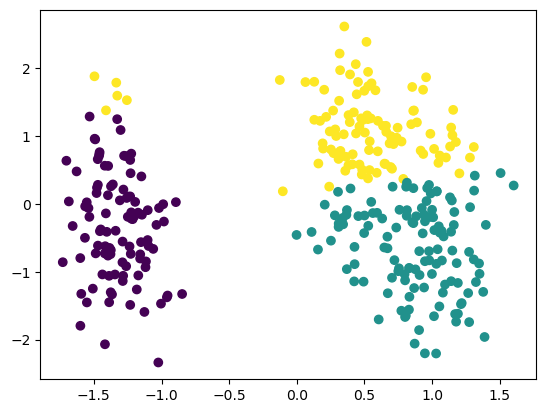

In [23]:
# plot final scatter plot 

plt.scatter(x_test_scaled[:,0],x_test_scaled[:,1],c=y_pred)

In [24]:
## validating the k value
## means jo value k ki select ki wo sahi ya nahi, here it was veryclear but it could be difficult to sleect
# 1. kneelocator
## 2. silhoutee scoring


In [25]:
# kneelocator
!pip install kneed

In [27]:
from kneed import KneeLocator

In [30]:
kl = KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing') # upar wala curve convex curve tha the one we plotted for elbow technique and k selection
# see google for concave and convex curve representtion, youll know, convex is like parabola and concave is like parabola upside down
# direction = decreasing coz in graph value is decreasing evidently

In [31]:
kl.elbow

3

In [32]:
# above we get k=3, so k is validated

In [33]:
## silhoutte scoring
from sklearn.metrics import silhouette_score

In [35]:
silhoute_coeff = []
for k in range(2,11):
    kmeans= KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x_train_scaled)
    score = silhouette_score(x_train_scaled,kmeans.labels_)
    silhoute_coeff.append(score)

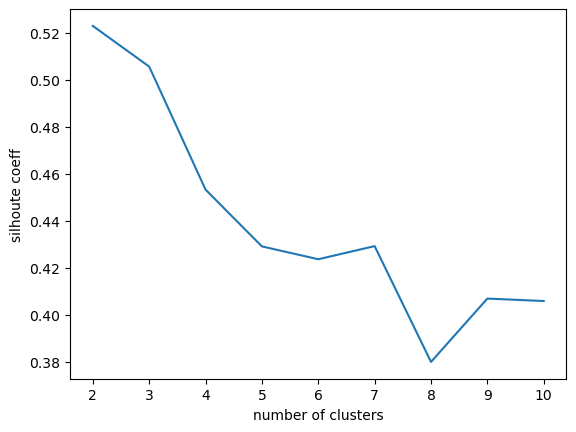

In [37]:
plt.plot(range(2,11),silhoute_coeff) 
plt.xticks(range(2,11)) 
plt.xlabel("number of clusters")
plt.ylabel("silhoute coeff")
plt.show()

In [ ]:
# highest is 3 after which it is dropping so we choose 3, here plot wa snot perfect, in video it was perfecr, u do kneed for validation
